In [ ]:
import pandas as pd
from math import log2
from collections import Counter
import matplotlib.pyplot as plt

def calculate_entropy(text_series):
    combined_text = ' '.join(text_series.dropna())


    #words = combined_text.lower().split()
    words = [word for word in combined_text.lower().split() if len(word) >= 3]
    word_counts = Counter(words)
    #print(combined_text)

    total_words = sum(word_counts.values())


    entropy = -sum((count / total_words) * log2(count / total_words) for count in word_counts.values())

    return entropy




In [ ]:
file_path_fake = '/content/DataSet_Misinfo_FAKE.csv'

df_fake = pd.read_csv(file_path_fake, on_bad_lines='skip', nrows=14000)

entropy_fake = calculate_entropy(df_fake['text'])
print(f"Entropy for FAKE dataset: {entropy_fake}")


Entropy for FAKE dataset: 11.747444188755695


In [ ]:
file_path_true = '/content/DataSet_Misinfo_TRUE.csv'

df_true = pd.read_csv(file_path_true, on_bad_lines='skip', nrows=14000)

entropy_true = calculate_entropy(df_true['text'])
print(f"Entropy for TRUE dataset: {entropy_true}")

Entropy for TRUE dataset: 11.53301845143097


In [ ]:
df_combined = pd.concat([df_true, df_fake], ignore_index=True)
entropy_combined = calculate_entropy(df_combined['text'])
print(f"Entropy for combined dataset: {entropy_combined}")

Entropy for combined dataset: 11.823149488027743


In [ ]:
from nltk.util import ngrams

def calculate_entropy_N(text_series, n=2):
    combined_text = ' '.join(text_series.dropna())
    #words = [word for word in combined_text.lower().split() if len(word) >= 3]
    words = combined_text.lower().split()

    n_grams = list(ngrams(words, n))
    n_gram_counts = Counter(n_grams)

    total_ngrams = sum(n_gram_counts.values())

    entropy = -sum((count / total_ngrams) * log2(count / total_ngrams) for count in n_gram_counts.values())

    return entropy


In [ ]:
entropy_fake_bigrams = calculate_entropy_N(df_fake['text'])
print(f"Entropy for FAKE dataset (bigrams): {entropy_fake_bigrams}")

Entropy for FAKE dataset (bigrams): 17.75955394857765


In [ ]:
entropy_true_bigramsn = calculate_entropy_N(df_true['text'])
print(f"Entropy for TRUE dataset (bigrams): {entropy_true_bigramsn}")

Entropy for TRUE dataset (bigrams): 17.38890404512564


In [ ]:
entropy_combined = calculate_entropy_N(df_combined['text'])
print(f"Entropy for combined dataset (bigrams): {entropy_combined}")

Entropy for combined dataset (bigrams): 18.038293913868287


In [ ]:
entropy_fake_trigrams = calculate_entropy_N(df_fake['text'], n=3)
print(f"Entropy for FAKE dataset (trigrams): {entropy_fake_trigrams}")

Entropy for FAKE dataset (trigrams): 20.96844164083579


In [ ]:
entropy_true_trigrams = calculate_entropy_N(df_true['text'], n=3)
print(f"Entropy for TRUE dataset (trigrams): {entropy_true_trigrams}")

Entropy for TRUE dataset (trigrams): 20.418889706280968


In [ ]:
entropy_combined = calculate_entropy_N(df_combined['text'], n=3)
print(f"Entropy for combined dataset (trigrams): {entropy_combined}")

Entropy for combined dataset (trigrams): 21.47958880394997


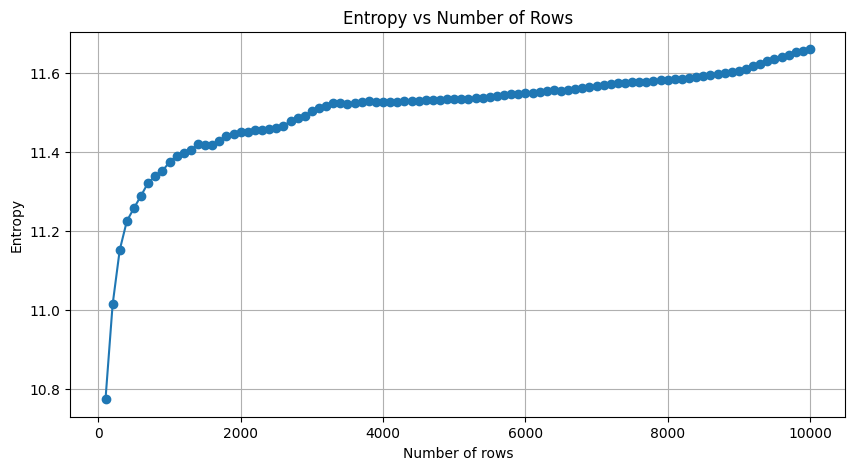

In [ ]:
def entropy_plot(file_path, max_rows, n=2):
    df = pd.read_csv(file_path, on_bad_lines='skip', nrows=max_rows)

    batch_sizes = range(100, max_rows + 1, 100)
    entropies = []

    for batch_size in batch_sizes:
        entropy = calculate_entropy(df['text'][:batch_size])
        entropies.append(entropy)

    plt.figure(figsize=(10, 5))
    plt.plot(batch_sizes, entropies, marker='o', linestyle='-')
    plt.xlabel('Number of rows')
    plt.ylabel('Entropy')
    plt.title('Entropy vs Number of Rows')
    plt.grid()
    plt.show()


file_path_fake = '/content/DataSet_Misinfo_FAKE.csv'
entropy_plot(file_path_fake, 10000, n=2)

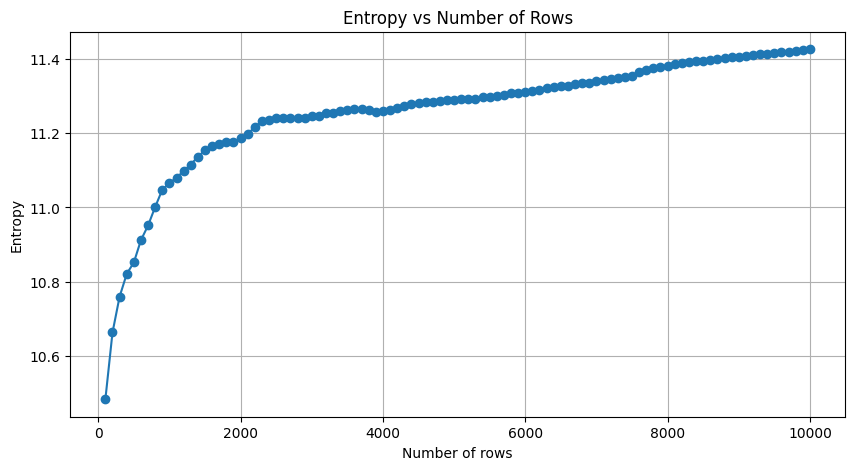

In [ ]:
file_path_fake = '/content/DataSet_Misinfo_TRUE.csv'
entropy_plot(file_path_fake, 10000, n=2)

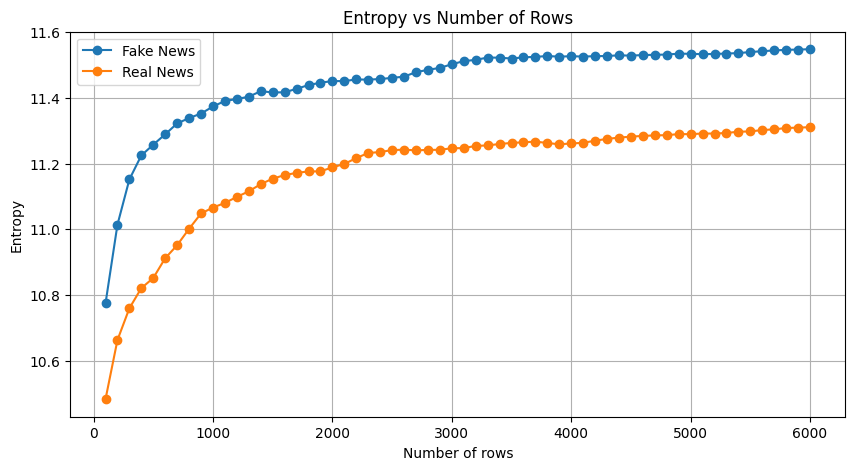

In [ ]:
def entropy_plot_2(file_paths, labels, max_rows, n=2):
    plt.figure(figsize=(10, 5))

    for file_path, label in zip(file_paths, labels):
        df = pd.read_csv(file_path, on_bad_lines='skip', nrows=max_rows)

        batch_sizes = range(100, max_rows + 1, 100)
        entropies = []

        for batch_size in batch_sizes:
            entropy = calculate_entropy(df['text'][:batch_size])
            entropies.append(entropy)

        plt.plot(batch_sizes, entropies, marker='o', linestyle='-', label=label)

    plt.xlabel('Number of rows')
    plt.ylabel('Entropy')
    plt.title('Entropy vs Number of Rows')
    plt.legend()
    plt.grid()
    plt.show()

file_paths = ['/content/DataSet_Misinfo_FAKE.csv', '/content/DataSet_Misinfo_TRUE.csv']
labels = ['Fake News', 'Real News']
entropy_plot_2(file_paths, labels, 6000, n=2)

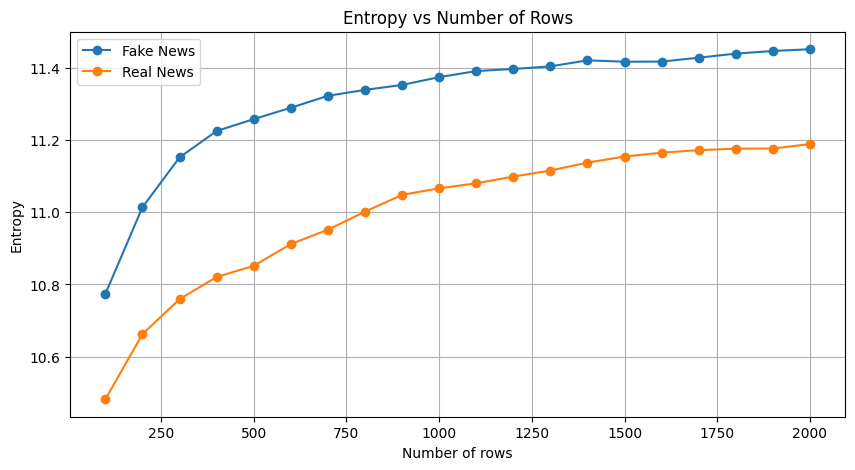

In [ ]:
def entropy_plot_3(file_paths, labels, max_rows, n=2):
    plt.figure(figsize=(10, 5))

    for file_path, label in zip(file_paths, labels):
        df = pd.read_csv(file_path, on_bad_lines='skip', nrows=max_rows)

        batch_sizes = range(10, max_rows + 1, 10)
        entropies = []

        for batch_size in batch_sizes:
            entropy = calculate_entropy(df['text'][:batch_size])
            entropies.append(entropy)

        plt.plot(batch_sizes, entropies, marker='o', linestyle='-', label=label)

    plt.xlabel('Number of rows')
    plt.ylabel('Entropy')
    plt.title('Entropy vs Number of Rows')
    plt.legend()
    plt.grid()
    plt.show()

file_paths = ['/content/DataSet_Misinfo_FAKE.csv', '/content/DataSet_Misinfo_TRUE.csv']
labels = ['Fake News', 'Real News']
entropy_plot_2(file_paths, labels, 2000, n=2)